In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data = pd.read_csv('./datasets/data.csv')
data = data.drop(['title', 'Unnamed: 0.1', 'Unnamed: 0', 'url', 'tags'], axis=1)
data

,text,normalized_text,topic
0,Фото: Анатолий Жданов / Коммерсантъ С 1 января...,['фото январь произойти ряд законодательный из...,Россия
1,Сергей Собянин. Фото: Пресс-служба Президента ...,"['', 'фото январь заработать новый система сбо...",Среда обитания
2,Фото: Константин Кокошкин / Globallookpress.co...,['фото январь поменяться правило проезд грузов...,Среда обитания
3,Фото: Юрий Мартьянов / Коммерсантъ В России с ...,['фото январь 2022 год вступить сила постановл...,Экономика
4,Фото: Сергей Киселев / АГН «Москва» В 2022 го...,"['фото', '2022 год вступать сила изменение зак...",Россия
...,...,...,...
16468,Уилл Смит и Джада Пинкетт-Смит. Фото: Mario An...,"['', 'фото американский актриса певица продюсе...",Культура
16469,Самолет МЧС России с эвакуированными из сектор...,['самолет эвакуировать сектор россиянин вылете...,Россия
16470,Джо Байден. Фото: Elizabeth Frantz / Reuters П...,"['', 'фото президент провоцировать ядерный кон...",Мир
16471,Фото: Petrov Sergey/news.ru/Global Look Press ...,['фото быть поддерживать желание вернуть приве...,Интернет и СМИ


In [18]:
data['topic'].value_counts()

Мир                  5469
Россия               2747
Бывший СССР          1944
Экономика            1772
Наука и техника      1063
Спорт                 689
Интернет и СМИ        543
Ценности              540
Из жизни              452
Среда обитания        306
Силовые структуры     270
Культура              264
Забота о себе         198
Путешествия           169
Моя страна             30
Бизнес                 10
69-я параллель          2
Оружие                  1
Name: topic, dtype: int64

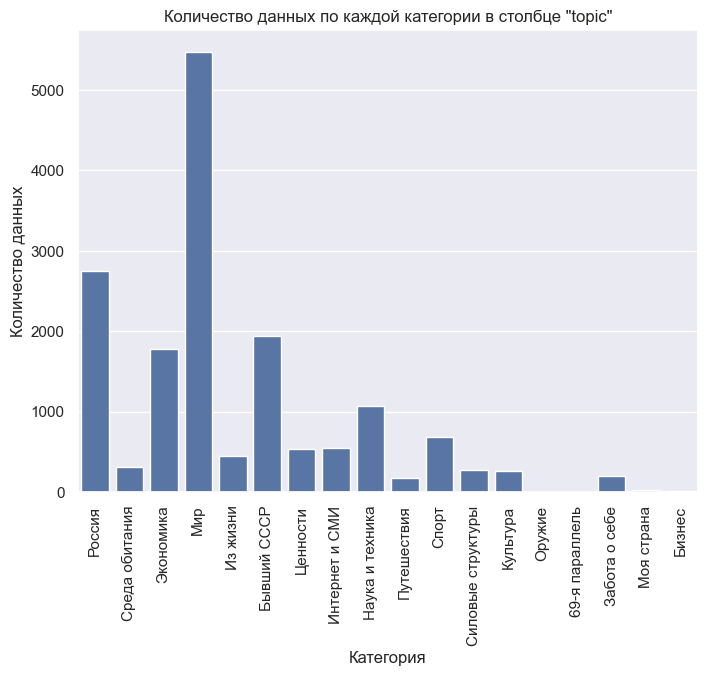

In [11]:
sns.set(style='darkgrid')
#sns.color_palette("tab10")
plt.figure(figsize=(8, 6))
sns.countplot(x='topic', data=data)
plt.title('Количество данных по каждой категории в столбце "topic"')
plt.xlabel('Категория')
plt.ylabel('Количество данных')
plt.xticks(rotation=90)
plt.show()

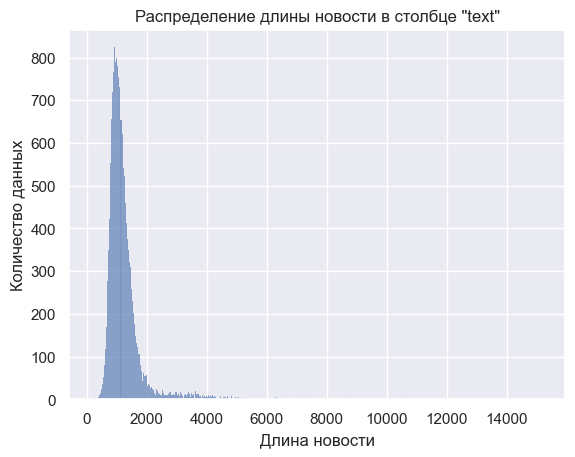

In [15]:
data['len_text'] = data['text'].str.len()


# Отображение графика распределения длины предложений
sns.set(style='darkgrid')
#plt.figure(figsize=(8, 6))
sns.histplot(x='len_text', data=data)
plt.title('Распределение длины новости в столбце "text"')
plt.xlabel('Длина новости')
plt.ylabel('Количество данных')
#plt.xticks(rotation=90)
plt.show()

In [16]:
data['len_text'].describe()

count    16473.000000
mean      1264.597827
std        791.664946
min        169.000000
25%        911.000000
50%       1089.000000
75%       1344.000000
max      15198.000000
Name: len_text, dtype: float64

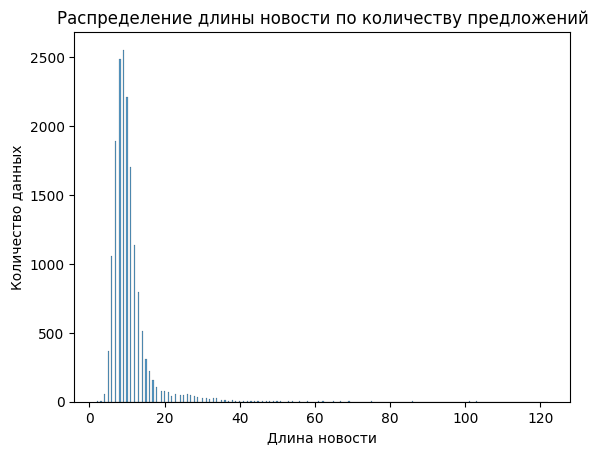

In [13]:
import ast

data['len_sentences'] = [len(ast.literal_eval(text)) for text in data['normalized_text']]

sns.histplot(x='len_sentences', data=data)
plt.title('Распределение длины новости по количеству предложений')
plt.xlabel('Длина новости')
plt.ylabel('Количество данных')
#plt.xticks(rotation=90)
plt.show()


In [ ]:
data = data[(data.normalized_len > 250) & (data.normalized_len < 1500)]
data = data.reset_index(drop=True)
data

In [14]:
data['len_sentences'].describe()

count    16473.000000
mean        10.663874
std          6.106529
min          2.000000
25%          8.000000
50%          9.000000
75%         12.000000
max        122.000000
Name: len_sentences, dtype: float64